# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Paulina Hambali
- **Email:** paulinahambali@gmail.com || mc009d5x2419@student.devacademy.id
- **ID Dicoding:** MC009D5X2419

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Pada musim apa penggunaan sepeda mengalami peningkatan tertinggi?
- Pertanyaan 2: Apakah terdapat peningkatan penggunaan sepeda antara tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
#Instalasi library yang digunakan.
!pip install numpy pandas scipy matplotlib seaborn

In [2]:
#Import library yang digunakan.
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
#Membaca dan memuat data day.csv
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#Membaca dan memuat data hour.csv
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv data berisikan penggunaan sepeda yang dicatat **per-hari**.
- hour.csv pada data berisikan penggunaan sepeda yang dicatat **per-jam**.
- (kedua data) menunjukan bahwa terdapat faktor-faktor yang mempengaruhi penggunaan sepeda, yakni
  - **season:** musim.
  - **year:** tahun terdiri dari 2 indikator 0 == 2011 dan 1 == 2012.
  - **mnth:** bulan.
  - **hr:** jam pagi/sore.
  - **holiday:** hari libur nasional == 0 dan akhir pekan == 1.
  - **weekday:** senin-minggu.
  - **workingday:** bukan akhir pekan atau holiday.
  - **weathersit:** cuaca.
  - **temp:** temperatur.
  - **hum:** kelembapan udara.
  - **windspeed:** kecepatan angin.
  - **casual:** yang bukan langganan.
  - **registered:** langganan.
  - **cnt:** count berarti jumlah penggunaan/penyewaan sepeda.

### Assessing Data

In [5]:
#Memeriksa tipe data dalam kolom dalam day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
#Cek missing values dalam day.csv
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
#Cek duplikasi data day.csv
print("Duplikasi data: ", day_df.duplicated().sum())


Duplikasi data:  0


In [8]:
#Cek di day.csv: mean, median, min, max, dsb.
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
#Memeriksa tipe data dalam kolom dalam hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
#Cek missing values dalam hour.csv
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
#Cek duplikasi data hour.csv
print("Duplikasi data: ", hour_df.duplicated().sum())


Duplikasi data:  0


In [12]:
#Cek di hour.csv: mean, median, min, max, dsb.
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada data day.csv tidak ditemukan nilai null (missing values) dan duplikasi data, dan didapatkan beberapa nilai, seperti mean, max, min, per 50% dan sebagainya serta tidak ditemukan inaccurate value karena tidak ada nilai anomali atau perbedaan yang tinggi.
- Pada data hour.csv tidak ditemukan nilai null (missing values) dan duplikasi data, dan didapatkan beberapa nilai, seperti mean, max, min, per 50% dan sebagainya.
- Ditemukan inaccurate value yakni pada kolom hum, karena seharusnya hum sama dengan 0.0.

### Cleaning Data

**Dari hasil assessing data, dihasilkan inaccurate value tetapi memang tidak dihasilkan adanya missing values, duplicated data. Namun, tetap akan dijalankan CLEANING DATA.**

In [13]:
# Menghilangkan duplikasi data day.csv
day_df.drop_duplicates(inplace=True)

In [14]:
# Duplikasi data day.csv
print("Duplikasi data: ", day_df.duplicated().sum())

Duplikasi data:  0


In [15]:
# Menangani missing values day.csv
# day_df[day_df.xy.isna()]
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [16]:
# Menangani inaccurate value hum pada day.csv dengan nilai rata-rata (mean)
mean_hum = day_df['hum'][day_df['hum'] != 0.0].mean()

In [17]:
# Replace hum dengan mean_hum.
day_df['hum'] = day_df['hum'].replace(0.0, mean_hum)

In [18]:
# Cek kolom hum.
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628754,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [19]:
# Menghilangkan duplikasi data hour.csv
hour_df.drop_duplicates(inplace=True)

In [20]:
# Duplikasi data hour.csv
print("Duplikasi data: ", hour_df.duplicated().sum())

Duplikasi data:  0


In [21]:
# Menangani missing values hour.csv
# hour_df[hour_df.xy.isna()]
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [22]:
# Menangani inaccurate value hour.csv
mean_hum = hour_df['hum'][hour_df['hum'] != 0.0].mean()

In [23]:
# Replace hum dengan mean_hum.
hour_df['hum'] = hour_df['hum'].replace(0.0, mean_hum)

In [24]:
# Cek kolom hum.
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628024,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Telah diterapkan beberapa proses dalam tahap cleaning data yakni drop duplicate = membuang nilai duplikasi, lalu isna untuk mengisi nilai null, dan replace untuk mengganti inaccurate value.
- Sebelumnya pada kolom hum ditemukan inaccurate value yakni 0.0, hal tersebut tidak mungkin ada nilai kelembapan hingga 0.0 sehingga digantikan nilainya dengan mean (rata-rata nilai hum).

## Exploratory Data Analysis (EDA)

### Explore ...

In [25]:
#Rangkuman Parameter Statistik day.csv
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628754,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [26]:
#Rangkuman Parameter Statistik hour.csv
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628024,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [27]:
#groupby antara season dan cnt (count atau jumlah penggunaan sepeda) day.csv (per-hari)
season_day = day_df.groupby(by="season").agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
}).reset_index()

print(season_day)


  season      cnt                                      
              sum         mean   max   min          std
0      1   471348  2604.132597  7836   431  1399.942119
1      2   918589  4992.331522  8362   795  1695.977235
2      3  1061129  5644.303191  8714  1115  1459.800381
3      4   841613  4728.162921  8555    22  1699.615261


In [28]:
#groupby antara yr dan cnt (count atau jumlah penggunaan sepeda) day.csv (per-hari)
year_day = day_df.groupby(by="yr").agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
}).reset_index()

print(year_day)


  yr      cnt                                     
          sum         mean   max  min          std
0  0  1243103  3405.761644  6043  431  1378.753666
1  1  2049576  5599.934426  8714   22  1788.667868


In [29]:
#Mengurutkan nilai (ascending), melihat penggunaan sepeda unique atau tertinggi (per-hari).
season_unique = day_df.groupby(by="season").dteday.nunique().sort_values(ascending=False)

print(season_unique)


season
3    188
2    184
1    181
4    178
Name: dteday, dtype: int64


In [30]:
#Mengurutkan nilai (ascending), melihat penggunaan sepeda unique atau tertinggi (per-hari).
year_unique = day_df.groupby(by="yr").dteday.nunique().sort_values(ascending=False)

print(year_unique)

yr
1    366
0    365
Name: dteday, dtype: int64


In [31]:
#groupby antara season dan cnt (count atau jumlah penggunaan sepeda) hour.csv (per-jam)
season_hour = hour_df.groupby(by="season").agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
}).reset_index()

print(season_hour)


  season      cnt                                 
              sum        mean  max min         std
0      1   471348  111.114569  801   1  119.224010
1      2   918589  208.344069  957   1  188.362473
2      3  1061129  236.016237  977   1  197.711630
3      4   841613  198.868856  967   1  182.967972


In [32]:
#groupby antara yr dan cnt (count atau jumlah penggunaan sepeda) hour.csv (per-jam)
year_hour = hour_df.groupby(by="yr").agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
}).reset_index()

print(year_hour)

  yr      cnt                                 
          sum        mean  max min         std
0  0  1243103  143.794448  651   1  133.797854
1  1  2049576  234.666361  977   1  208.910941


In [33]:
#Mengurutkan nilai (ascending), melihat penggunaan sepeda unique atau tertinggi (per-jam).
season_unique = hour_df.groupby(by="season").dteday.nunique().sort_values(ascending=False)

print(season_unique)


season
3    188
2    184
1    181
4    178
Name: dteday, dtype: int64


In [34]:
#Mengurutkan nilai (ascending), melihat penggunaan sepeda unique atau tertinggi (per-jam).
year_unique = hour_df.groupby(by="yr").dteday.nunique().sort_values(ascending=False)

print(year_unique)

yr
1    366
0    365
Name: dteday, dtype: int64


In [35]:
# MERGE-DATA
merged_df = pd.merge(hour_df, day_df, on="dteday", suffixes=('_hour', '_day'))
print(merged_df.head())


   instant_hour      dteday  season_hour  yr_hour  mnth_hour  hr  \
0             1  2011-01-01            1        0          1   0   
1             2  2011-01-01            1        0          1   1   
2             3  2011-01-01            1        0          1   2   
3             4  2011-01-01            1        0          1   3   
4             5  2011-01-01            1        0          1   4   

   holiday_hour  weekday_hour  workingday_hour  weathersit_hour  ...  \
0             0             6                0                1  ...   
1             0             6                0                1  ...   
2             0             6                0                1  ...   
3             0             6                0                1  ...   
4             0             6                0                1  ...   

   weekday_day  workingday_day  weathersit_day  temp_day  atemp_day   hum_day  \
0            6               0               2  0.344167   0.363625  0.805833

In [36]:
#groupby season-yr
season_year = merged_df.groupby(by=["season_day", "yr_day"]).agg({
    "cnt_day": "sum",
    "cnt_hour": "sum"
}).reset_index()
print(season_year)

   season_day  yr_day   cnt_day  cnt_hour
0           1       0   3494647    150000
1           1       1   7684500    321348
2           2       0   8324317    347316
3           2       1  13699754    571273
4           3       0  10025307    419650
5           3       1  15395496    641479
6           4       0   7820997    326137
7           4       1  12346032    515476


**Insight:**
- Penggunaan sepeda berdasarkan musim 1-4 (1 == spring, 2 == summer, 3 == fall, 4 == winter) dan didapatkan rata-rata baik per-hari maupun per-jam, penggunaan sepeda tertinggi ada pada indeks ke-3 atau fall.
- Penggunaan sepeda berdasarkan tahun 0 == 2011 dan 1 == 2012, ditunjukan bahwa baik per-hari maupun per-jam penggunaan sepeda tertinggi ada pada indeks 1 atau 2012.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa penggunaan sepeda mengalami peningkatan tertinggi?

In [37]:
#groupby season-cnt
season_usage = merged_df.groupby(by="season_day").agg({
    "cnt_day": "sum",
    "cnt_hour": "sum"
}).reset_index()


In [38]:
#Mengganti nama indeks season
season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_usage['season_day'] = season_usage['season_day'].map(season_names)

In [39]:
#total cnt dari gabungan data day dan hour.
season_usage['total_cnt_season'] = season_usage['cnt_day'] + season_usage['cnt_hour']

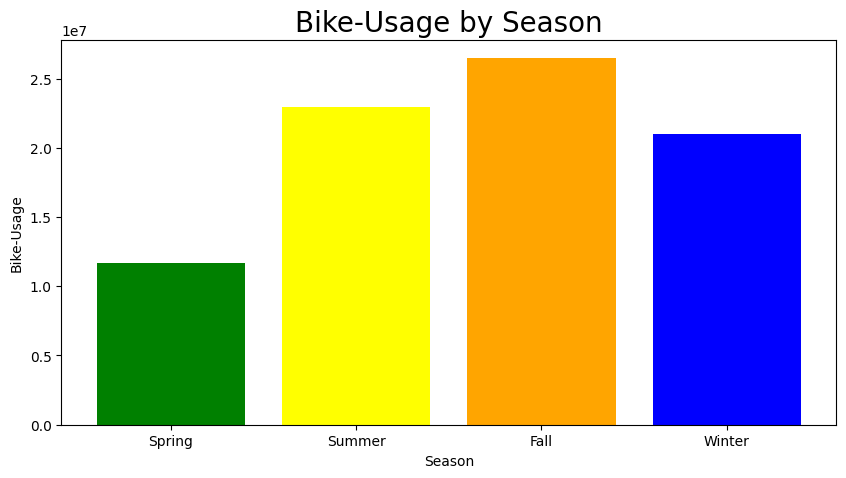

In [40]:
# Plot total penggunaan sepeda berdasarkan season (musim)
plt.figure(figsize=(10, 5))
plt.bar(season_usage["season_day"], season_usage["total_cnt_season"], color=['green', 'yellow', 'orange', 'blue'])
plt.title("Bike-Usage by Season", loc="center", fontsize=20)
plt.xlabel("Season")
plt.ylabel("Bike-Usage")
plt.show()

### Pertanyaan 2: Apakah terdapat peningkatan penggunaan sepeda antara tahun 2011 dan 2012?

In [41]:
#groupby yr-cnt
year_usage = merged_df.groupby(by="yr_day").agg({
    "cnt_day": "sum",
    "cnt_hour": "sum"
}).reset_index()

In [42]:
#Mengganti indeks tahun.
year_usage['yr_day'] = year_usage['yr_day'].replace({0: 2011, 1: 2012})

In [43]:
#Memastikan tipe data = int
year_usage['yr_day'] = year_usage['yr_day'].astype(int)

In [44]:
#total cnt dari gabungan data day dan hour.
year_usage['total_cnt_year'] = year_usage['cnt_day'] + year_usage['cnt_hour']

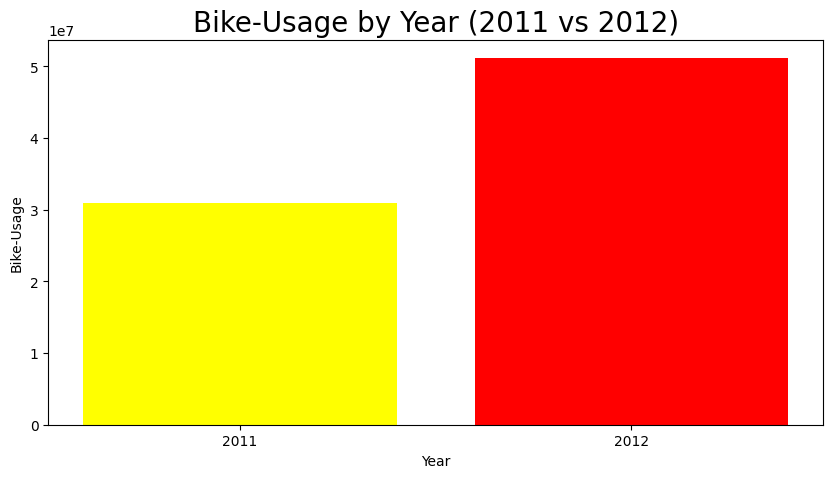

In [45]:
# Plot total penggunaan sepeda berdasarkan yr (tahun)
plt.figure(figsize=(10, 5))
plt.bar(year_usage["yr_day"], year_usage["total_cnt_year"], color=['yellow', 'red'])
plt.title("Bike-Usage by Year (2011 vs 2012)", loc="center", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Bike-Usage")
plt.xticks(year_usage["yr_day"])
plt.show()

**Insight:**
- Pada grafik atau plot season didapatkan bahwa penggunaan sepeda tertinggi ada pada fall season yang hampir menyentuh nilai 2,5.
- Pada grafik atau plot year didapatkan bahwa penggunaan sepeda tertinggi ada pada tahun 2012 yang diinterpretasikan menyentuh angka 5.

## Analisis Lanjutan (Opsional)

## Conclusion

**- Conclution pertanyaan 1: Pada musim apa penggunaan sepeda mengalami peningkatan tertinggi?**

Berdasarkan hasil analisis dan visualisasi, penggunaan sepeda mengalami peningkatan tertinggi selama Fall urutan pertama, lalu summer urutan kedua, urutan ketiga itu ada pada winter, dan terakhir spring. Hal ini mungkin terjadi dikarenakan faktor lain yang mempengaruhi, yakni suhu (temperatur), cuaca (weathersit), dan jam (hr).

  Data yang didapatkan dari penggabungan data day.csv dan hour.csv yang dilakukan perintah groupby, dan merge. Dimana, diambilnya rata-rata (sum) dari kedua data. Untuk data yang digunakan di season plot, yakni season_usage.

  Dalam grafik atau plot, terdapat nilai y sebagai acuan bike-usage = count, dan nilai x sebagai variabel yang sedang diamati, yakni season yang terdiri dari indeks 1,2,3,4 (spring,summer,fall,winter).

  Dengan melakukan analisis dan visualisasi data, kita dapat melakukan analisis lebih lanjut terkait data yang ada, seperti pertanyaan bisnis lain, yakni bagaimana suhu dan cuaca mempengaruhi penggunaan sepeda terhadap season (musim)?

**- Conclution pertanyaan 2: Apakah terdapat peningkatan penggunaan sepeda antara tahun 2011 dan 2012?**

Berdasarkan hasil analisis dan visualisasi, penggunaan sepeda mengalami peningkatan tertinggi pada tahun 2012. Hal ini terjadi dikarenakan faktor lain, mungkin pada tahun 2012 cuaca lebih mendukung, atau suhu, dan sebagainya.

  Data yang didapatkan dari penggabungan data day.csv dan hour.csv yang dilakukan perintah groupby, dan merge. Dimana, diambilnya rata-rata (sum) dari kedua data. Untuk data yang digunakan di year plot, yakni year_usage.

  Dalam grafik atau plot, terdapat nilai y sebagai acuan bike-usage = count, dan nilai x sebagai variabel yang sedang diamati, yakni year yang terdiri dari indeks 0,1 (0 == 2011 dan 1 ==2012).

  Dengan melakukan analisis dan visualisasi data, kita dapat melakukan analisis lebih lanjut terkait data yang ada, seperti pertanyaan bisnis lain, yakni bagaimana suhu dan cuaca mempengaruhi peningkatan penggunaan sepeda terhadap year (tahun)?

## Create New Dataset from Data Wrangling

In [48]:
day_df.to_csv('data/day_wrangled.csv', index = False)

In [49]:
day_df = pd.read_csv("data/day_wrangled.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [50]:
hour_df.to_csv('data/hour_wrangled.csv', index = False)

In [51]:
hour_df = pd.read_csv("data/hour_wrangled.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1
